# 【Matplotlib】2軸グラフの作成方法
説明リンク --> https://brainsnacks.org/matplotlib_twinax/

In [2]:
#　必要なライブラリの読み込み
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## データセットの読み込み

In [3]:
#使用データセット入手先 -> https://www.kaggle.com/unitednations/international-greenhouse-gas-emissions
#国連提供 温室効果ガスデータセット 1990-2017

#データの読み込み　
directory = ["../Data"]
file = ["greenhouse_gas_inventory_data.csv"]
df = pd.read_csv(os.path.join(directory[0], file[0]))
Column_List = df.columns

print('--------------------------------------------------')
print('df_shape: (%i,%i)' % df.shape)
print('--------------------------------------------------')

df.head()

--------------------------------------------------
df_shape: (8406,4)
--------------------------------------------------


,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  8406 non-null   object 
 1   year             8406 non-null   int64  
 2   value            8406 non-null   float64
 3   category         8406 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 262.8+ KB


## 可視化情報の抽出

In [6]:
#国別のデータ量を確認
df["country_or_area"].value_counts()

United States of America    250
European Union              250
Germany                     250
Japan                       225
France                      225
Canada                      223
Austria                     221
Italy                       217
Ireland                     216
Switzerland                 207
Belgium                     205
Russian Federation          200
Netherlands                 200
Romania                     200
Finland                     200
Norway                      200
Australia                   200
Greece                      200
United Kingdom              200
Sweden                      200
New Zealand                 198
Hungary                     198
Iceland                     197
Slovakia                    196
Slovenia                    195
Denmark                     194
Czech Republic              193
Poland                      191
Ukraine                     189
Portugal                    183
Malta                       179
Croatia 

In [7]:
# Uniqueなカテゴリーを確認
category_name = df["category"].unique()
category_name

array(['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent',
       'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent',
       'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent',
       'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent',
       'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'],
      dtype=obj

In [8]:
#今回使用するCO2とCH4のcategoryがどれになるかを確認
category_name = df["category"].unique()

In [9]:
#日本のCO2排出量でフィルタリング
df_co2 = df[(df["category"] == category_name[0]) & (df["country_or_area"] == "Japan")]

In [10]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 500 to 524
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  25 non-null     object 
 1   year             25 non-null     int64  
 2   value            25 non-null     float64
 3   category         25 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1000.0+ bytes


In [11]:
#CH4排出量でフィルタリング
df_ch4 = df[(df["category"] == category_name[4]) & (df["country_or_area"] == "Japan")]

In [12]:
df_ch4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 4572 to 4596
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  25 non-null     object 
 1   year             25 non-null     int64  
 2   value            25 non-null     float64
 3   category         25 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1000.0+ bytes


In [33]:
print(df_co2.info())
print(df_ch4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 500 to 524
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  25 non-null     object 
 1   year             25 non-null     int64  
 2   value            25 non-null     float64
 3   category         25 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1000.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 4572 to 4596
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  25 non-null     object 
 1   year             25 non-null     int64  
 2   value            25 non-null     float64
 3   category         25 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1000.0+ bytes
None


## 日本のCO2およびCH4排出量の可視化

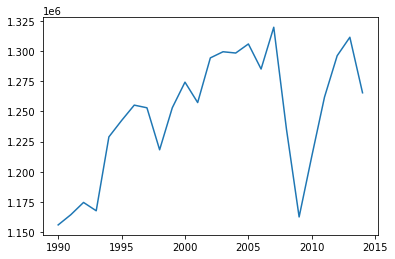

In [13]:
#時系列データの表示

#plot用の箱を作成
fig, ax = plt.subplots()

#x軸に時間、y軸にco2の排出量を記載
ax.plot(df_co2["year"], df_co2["value"])
plt.show()

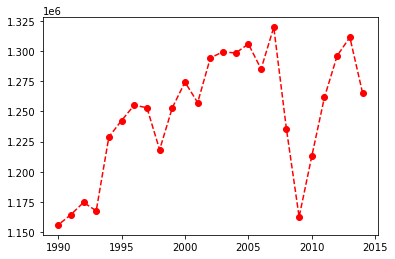

In [14]:
#label/markerの追加

#plot用の箱を作成
fig, ax = plt.subplots()

#x軸に時間、y軸にco2の排出量を記載
ax.plot(df_co2["year"], df_co2["value"], marker ="o", linestyle = "--", color ="r")
plt.show()

 Markerの種類 -> https://matplotlib.org/stable/api/markers_api.html<br>
 Linestyleの種類 -> https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html<br>
 Colorの種類 -> https://matplotlib.org/stable/gallery/color/named_colors.html

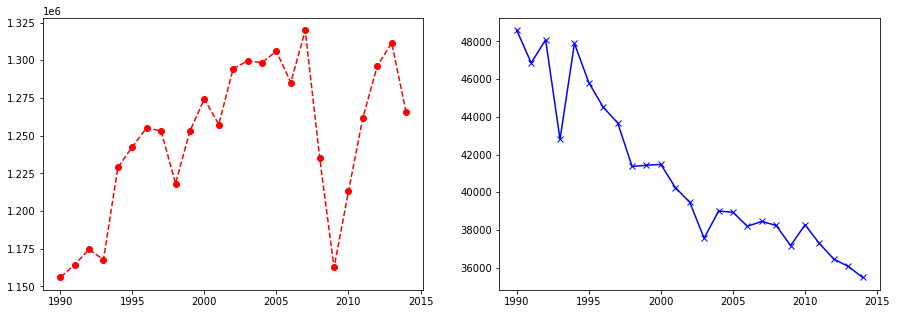

In [24]:
#Subplotでメタンの排出量を別グラフに示す

#plot用の箱を作成
fig, ax = plt.subplots(1,2,figsize=(15,5))

#x軸に時間、y軸にco2の排出量を記載
#CO2排出量
ax[0].plot(df_co2["year"], df_co2["value"], marker ="o", linestyle = "--", color ="r")
#メタン排出量
ax[1].plot(df_ch4["year"], df_ch4["value"], marker ="x", linestyle = "-", color ="b")
plt.show()

Subplotの作法 -> https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

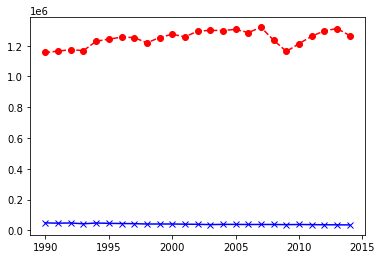

In [25]:
#同じグラフに2軸示す

#plot用の箱を作成
fig, ax = plt.subplots()

#x軸に時間、y軸にco2の排出量を記載
#CO2排出量
ax.plot(df_co2["year"], df_co2["value"], marker ="o", linestyle = "--", color ="r")
#メタン排出量
ax.plot(df_ch4["year"], df_ch4["value"], marker ="x", linestyle = "-", color ="b")
plt.show()

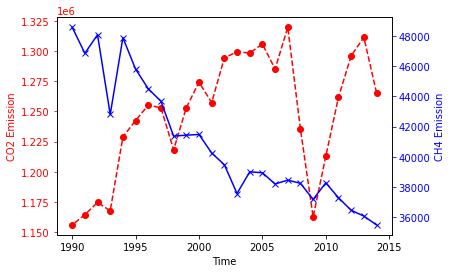

In [26]:
#同じグラフに2軸示す

#plot用の箱を作成
fig, ax = plt.subplots()
ax2 = ax.twinx()

#x軸に時間、y軸にco2の排出量を記載
#CO2排出量
ax.plot(df_co2["year"], df_co2["value"], marker ="o", linestyle = "--", color ="r")
ax.set_xlabel('Time')
ax.set_ylabel('CO2 Emission', color='r')
ax.tick_params('y', colors="r")

#メタン排出量
ax2.plot(df_ch4["year"], df_ch4["value"], marker ="x", linestyle = "-", color ="b")
ax2.set_ylabel('CH4 Emission', color='b')
ax2.tick_params('y', colors="b")
plt.show()